## Exercicio 1
1. Criar uma nova matriz de nome X de tamanho 4 x 5 com os valores 1 1 2 1 3, 1 1 2 3 1, 2 2 3 2 2, 1 3 2 1 1.
2. Converta para imagem de intensidade manualmente e chame a nova matriz de Y.
    -  valor mínimo da matriz X será mapeado para 0 e o valor máximo para 1.
    - $$y_{i,j}=\frac{x_{i.j}-min(X)}{max(X)-min(X)}$$
3. Converter matrizes em imagens do tipo intensidade de cores.
4. Visualizar os valores da matriz Y e Z.
5. Descreva o resultado

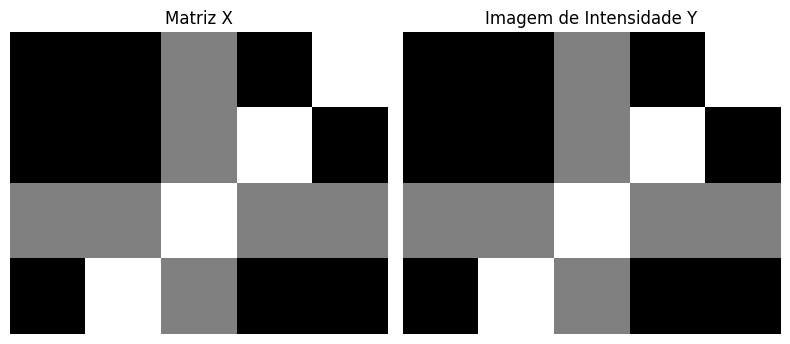

In [3]:
# Exercicio 1
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1. Criar a matriz X
X = np.array([[1, 1, 2, 1, 3],
              [1, 1, 2, 3, 1],
              [2, 2, 3, 2, 2],
              [1, 3, 2, 1, 1]])

# 2. Converter para imagem de intensidade (Y)
X_min = X.min()
X_max = X.max()
Y = (X - X_min) / (X_max - X_min)

# Plotar X e Y usando matplotlib
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(X, cmap='gray', vmin=X_min, vmax=X_max)
axs[0].set_title('Matriz X')
axs[0].axis('off')

axs[1].imshow(Y, cmap='gray', vmin=0, vmax=1)
axs[1].set_title('Imagem de Intensidade Y')
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Plotar X e Y usando OpenCV (em janelas separadas)
cv2.imshow('Matriz X (OpenCV)', (255 * (X - X_min) / (X_max - X_min)).astype(np.uint8))
cv2.imshow('Imagem de Intensidade Y (OpenCV)', (255 * Y).astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

## Exercicio 2
1. Criar três imagens binárias. 
    - Primeira A=zeros(300,300); A(25:175,125:175)=1;
    - Segunda: B=zeros(300,300); B(125:175,25:175)=1;
    - Terceira: C=zeros(300,300); C(150:300,150:300)=1;
2. Visualizar as três imagens em uma mesma janela. Colocar o nome nas figuras.
subplot(1,3,1), imshow(A), title(‘Imagem A’) subplot(1,3,2), imshow(B), title(‘Imagem B’) subplot(1,3,3), imshow(C), title(‘Imagem C’)

0


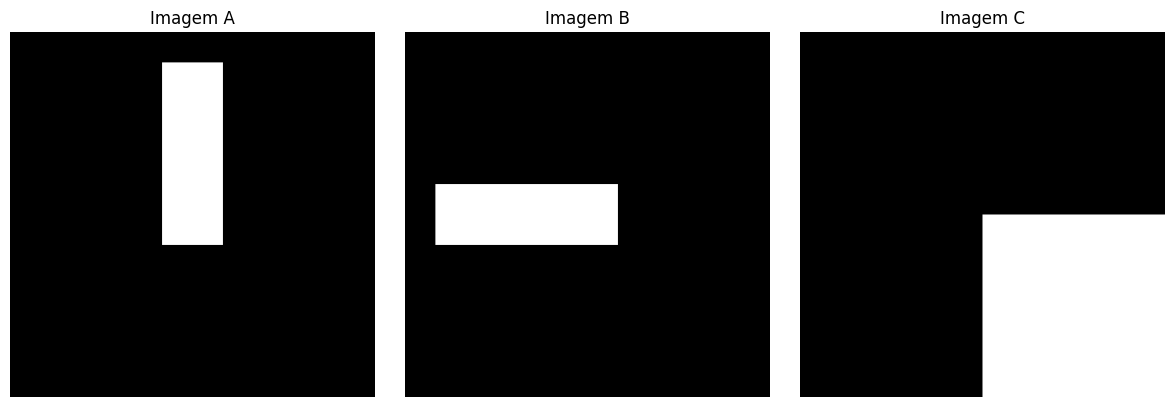

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Imagem A: zeros e um retângulo de 1s
## linhas e colunas vão de 0 a 299
A = np.zeros((300, 300), dtype=np.uint8)
# 125:175
A[25:176, 125:176] = 1

# Imagem B: zeros e outro retângulo de 1s
B = np.zeros((300, 300), dtype=np.uint8)
B[125:176, 25:176] = 1

# Imagem C: zeros e um quadrado de 1s no canto inferior direito
C = np.zeros((300, 300), dtype=np.uint8)
C[150:300, 150:300] = 1
print(C[150,150])

# Visualizar as três imagens em uma mesma janela com matplotlib
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(A, cmap='gray')
axs[0].set_title('Imagem A')
axs[0].axis('off')
axs[1].imshow(B, cmap='gray')
axs[1].set_title('Imagem B')
axs[1].axis('off')
axs[2].imshow(C, cmap='gray')
axs[2].set_title('Imagem C')
axs[2].axis('off')
plt.tight_layout()
plt.show()

## Exercicio 03
1. Realize todas as possíveis somas entre as imagens binárias criadas anteriormente.
2. Visualizar todas as imagens em uma mesma janela, incluindo as originais.
3. Verifique se a ordem dos fatores altera os resultados.
4. Justifique os resultados nas interseções das imagens.

1


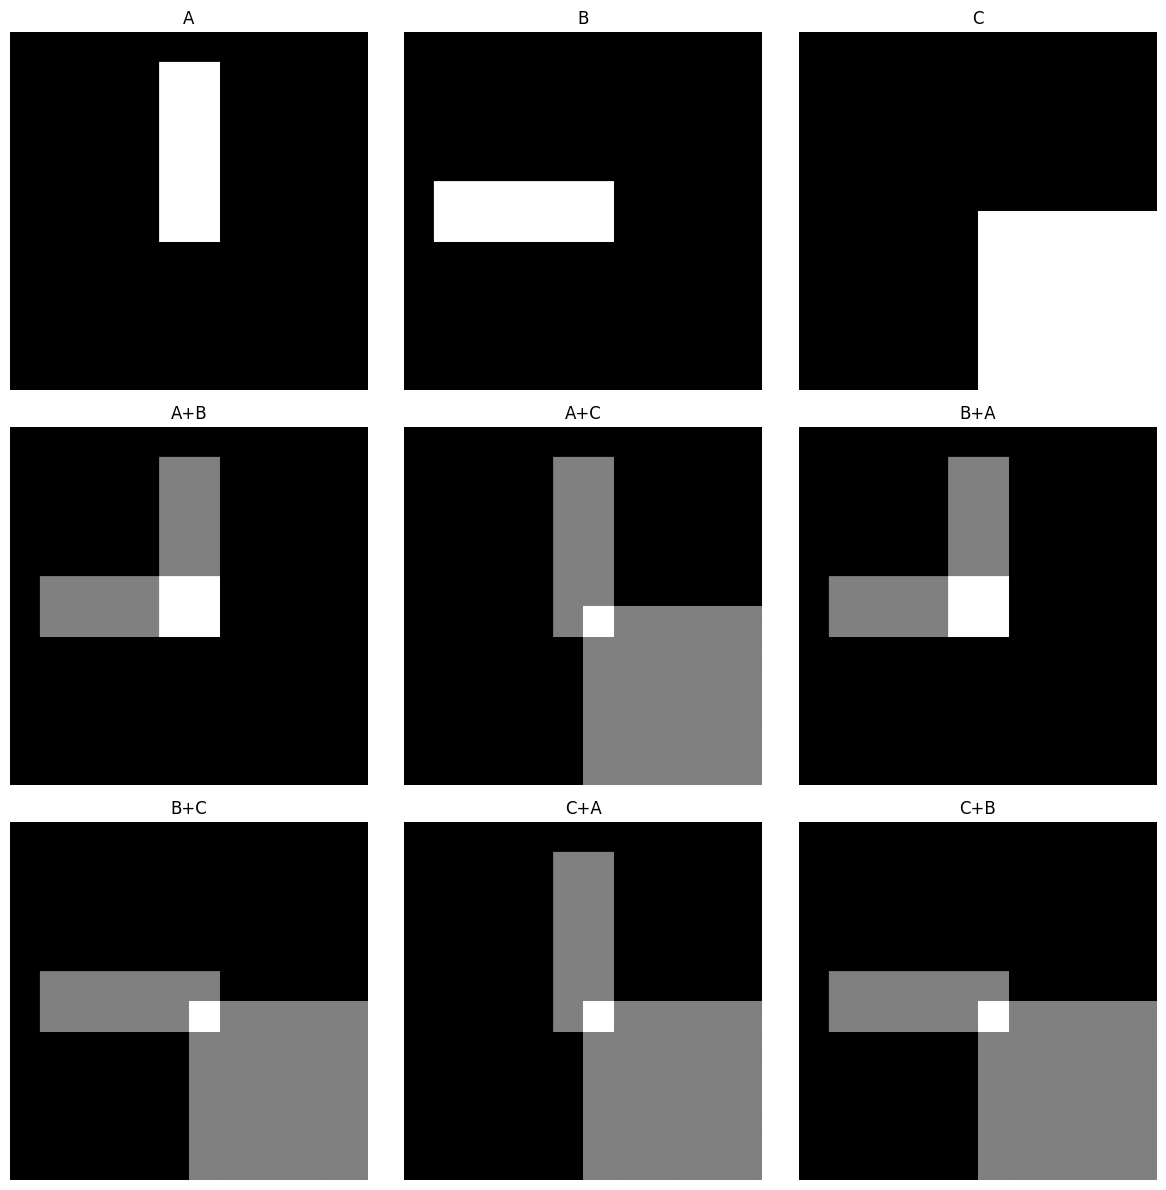

A+B == B+A: True
A+C == C+A: True
B+C == C+B: True


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Imagem A: zeros e um retângulo de 1s
## linhas e colunas vão de 0 a 299
A = np.zeros((300, 300), dtype=np.uint8)
# 125:175
A[25:176, 125:176] = 1

# Imagem B: zeros e outro retângulo de 1s
B = np.zeros((300, 300), dtype=np.uint8)
B[125:176, 25:176] = 1

# Imagem C: zeros e um quadrado de 1s no canto inferior direito
C = np.zeros((300, 300), dtype=np.uint8)
C[150:300, 150:300] = 1
print(C[150,150])

# As possiveis somas são A+B A+C B+A B+C C+A C+B
somas = {
    'A+B': A + B,
    'A+C': A + C,
    'B+A': B + A,
    'B+C': B + C,
    'C+A': C + A,
    'C+B': C + B,
}

titulos = ['A', 'B', 'C', 'A+B', 'A+C', 'B+A', 'B+C', 'C+A', 'C+B']
imagens = [A, B, C, somas['A+B'], somas['A+C'], somas['B+A'], somas['B+C'], somas['C+A'], somas['C+B']]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for ax, img, title in zip(axs.flat, imagens, titulos):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Verificar se a ordem dos fatores altera o resultado
print('A+B == B+A:', np.array_equal(somas['A+B'], somas['B+A']))
print('A+C == C+A:', np.array_equal(somas['A+C'], somas['C+A']))
print('B+C == C+B:', np.array_equal(somas['B+C'], somas['C+B']))


## Resposta Exercício 03
Justificativa das interseções:
A soma de imagens binárias resulta em valores 0 (nenhuma), 1 (apenas uma) ou 2 (interseção).
A ordem dos fatores não altera o resultado, pois a soma é comutativa.
Nas regiões de interseção, o valor será 2, indicando sobreposição das regiões brancas das imagens originais.

## Exercício 04
1. Realize todas as possíveis subtrações entre as imagens binárias criadas anteriormente.
2. Visualizar todas as imagens em uma mesma janela, incluindo as originais.
3. Verifique se a ordem dos fatores altera os resultados. Justifique os resultados nas interseções das imagens.

1


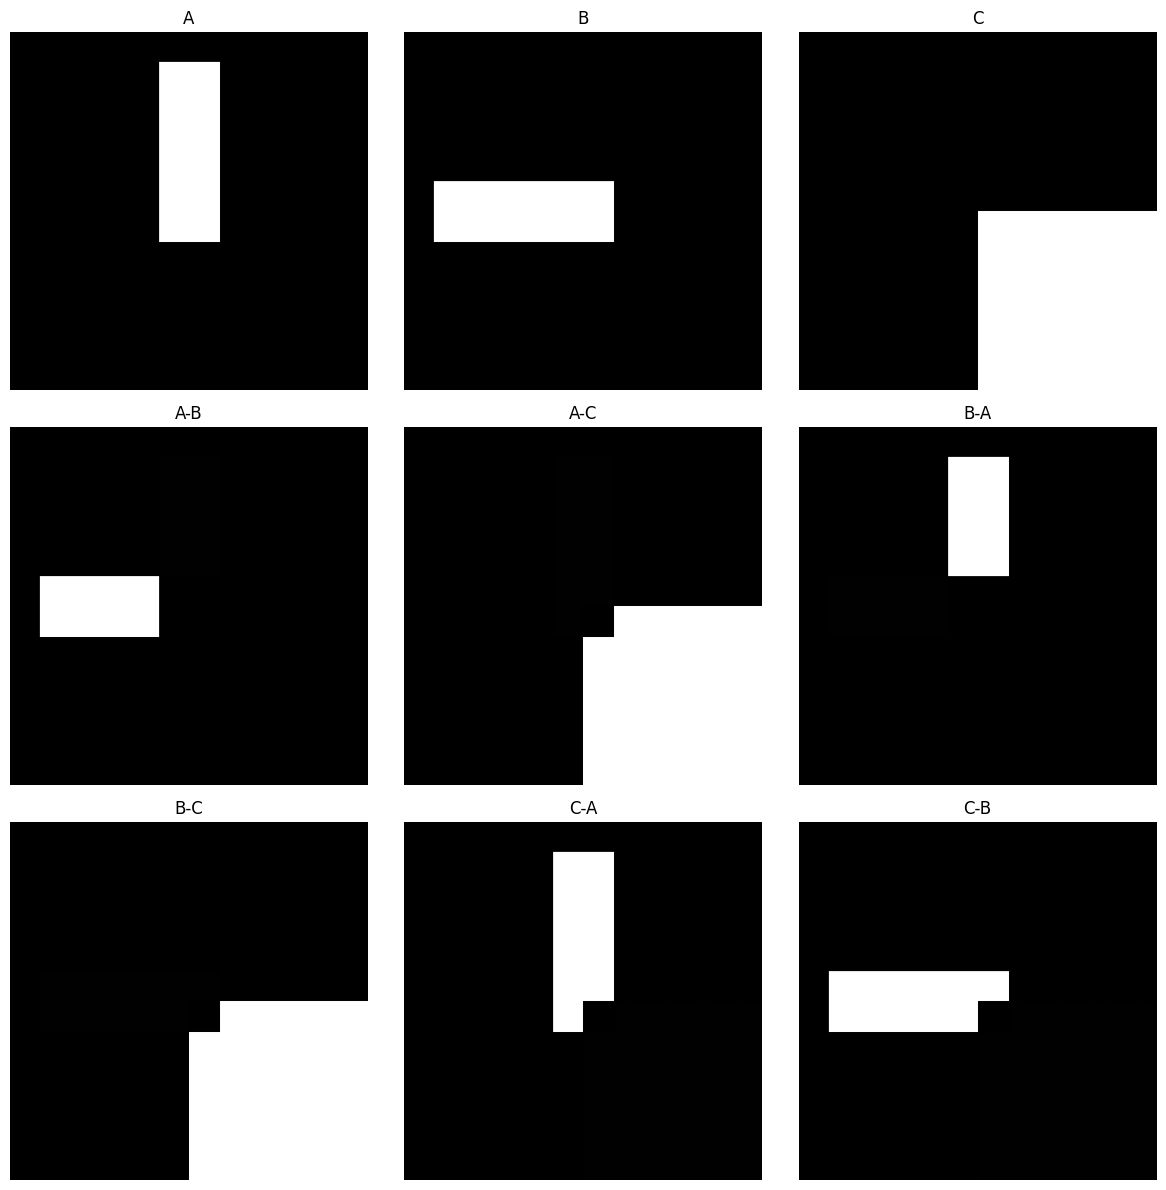

0
A-B == B-A: False
A-C == C-A: False
B-C == C-B: False


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Imagem A: zeros e um retângulo de 1s
## linhas e colunas vão de 0 a 299
A = np.zeros((300, 300), dtype=np.uint8)
# 125:175
A[25:176, 125:176] = 1

# Imagem B: zeros e outro retângulo de 1s
B = np.zeros((300, 300), dtype=np.uint8)
B[125:176, 25:176] = 1

# Imagem C: zeros e um quadrado de 1s no canto inferior direito
C = np.zeros((300, 300), dtype=np.uint8)
C[150:300, 150:300] = 1
print(C[150,150])

# As possiveis subtrações são A-B A-C B-A B-C C-A C-B
somas = {
    'A-B': A - B,
    'A-C': A - C,
    'B-A': B - A,
    'B-C': B - C,
    'C-B': C - B,
    'C-A': C - A,
}

titulos = ['A', 'B', 'C', 'A-B', 'A-C', 'B-A', 'B-C', 'C-A', 'C-B']
imagens = [A, B, C, somas['A-B'], somas['A-C'], somas['B-A'], somas['B-C'], somas['C-A'], somas['C-B']]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for ax, img, title in zip(axs.flat, imagens, titulos):
    ax.imshow(img, cmap='gray', vmin=-1, vmax=1)
    # ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Verificar se a ordem dos fatores altera o resultado
print('A-B == B-A:', np.array_equal(somas['A-B'], somas['B-A']))
print('A-C == C-A:', np.array_equal(somas['A-C'], somas['C-A']))
print('B-C == C-B:', np.array_equal(somas['B-C'], somas['C-B']))

## Resposta Exercício 04
Justificativa das interseções:
A subtração de imagens binárias resulta em valores
    - 0 (A = B)
    - 1 (B = 1 e A = 0)
    - -1 (B = 0 A = 1).
A ordem dos fatores altera o resultado, invertendo os valores -1 e 1.
Mas ao plotar podemos alterar o valor minimo e maximo fazendo com que valores negativos e positivos recebem a mesma cor.

## Exercício 05
1. Realize todas as possíveis multiplicações (.*) entre as imagens binárias criadas anteriormente.
2. Visualizar todas as imagens em uma mesma janela, incluindo as originais.
3. Verifique se a ordem dos fatores altera os resultados. Justifique os resultados nas interseções das imagens.

1


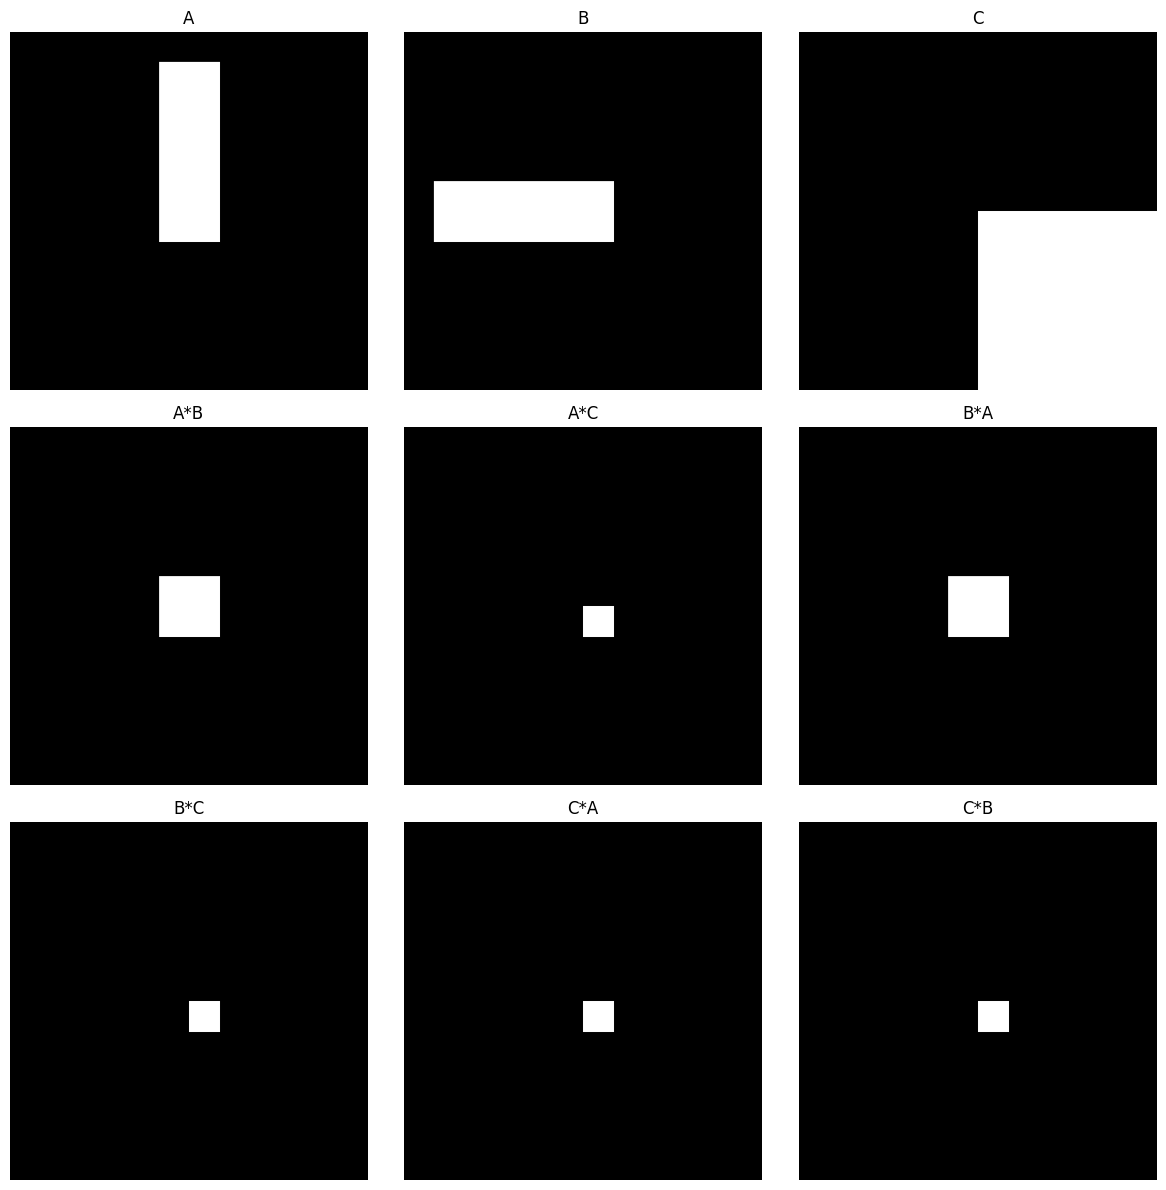

A*B == B*A: True
A*C == C*A: True
B*C == C*B: True


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Imagem A: zeros e um retângulo de 1s
## linhas e colunas vão de 0 a 299
A = np.zeros((300, 300), dtype=np.uint8)
# 125:175
A[25:176, 125:176] = 1

# Imagem B: zeros e outro retângulo de 1s
B = np.zeros((300, 300), dtype=np.uint8)
B[125:176, 25:176] = 1

# Imagem C: zeros e um quadrado de 1s no canto inferior direito
C = np.zeros((300, 300), dtype=np.uint8)
C[150:300, 150:300] = 1
print(C[150,150])

# As possiveis subtrações são A*B A*C B*A B*C C*A C*B
somas = {
    'A*B': A * B,
    'A*C': A * C,
    'B*A': B * A,
    'B*C': B * C,
    'C*B': C * B,
    'C*A': C * A,
}

titulos = ['A', 'B', 'C', 'A*B', 'A*C', 'B*A', 'B*C', 'C*A', 'C*B']
imagens = [A, B, C, somas['A*B'], somas['A*C'], somas['B*A'], somas['B*C'], somas['C*A'], somas['C*B']]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for ax, img, title in zip(axs.flat, imagens, titulos):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Verificar se a ordem dos fatores altera o resultado
print('A*B == B*A:', np.array_equal(somas['A*B'], somas['B*A']))
print('A*C == C*A:', np.array_equal(somas['A*C'], somas['C*A']))
print('B*C == C*B:', np.array_equal(somas['B*C'], somas['C*B']))

## Resposta Exercício 05
Justificativa das interseções:
A multiplicação de imagens binárias resulta em valores
    - 0 (1x0 ou 0x1)
    - 1 (1x1)
A ordem dos fatores não altera o resultado.
Na pratica estamos fazendo com que somente possuam o valor 1 os pixels que possuem valor 1 tanto em A quanto em B

## Exercício 06
1. Realize todas as possíveis divisões (./) entre as imagens binárias criadas anteriormente.
2. Visualizar todas as imagens em uma mesma janela, incluindo as originais.
3. Verifique se a ordem dos fatores altera os resultados. Justifique os resultados nas interseções das imagens.

1


/tmp/ipykernel_6613/3459853180.py:22: RuntimeWarning: divide by zero encountered in divide
  'A/B': np.where(B != 0, A / B, 0),
/tmp/ipykernel_6613/3459853180.py:22: RuntimeWarning: invalid value encountered in divide
  'A/B': np.where(B != 0, A / B, 0),
/tmp/ipykernel_6613/3459853180.py:23: RuntimeWarning: divide by zero encountered in divide
  'A/C': np.where(C != 0, A / C, 0),
/tmp/ipykernel_6613/3459853180.py:23: RuntimeWarning: invalid value encountered in divide
  'A/C': np.where(C != 0, A / C, 0),
/tmp/ipykernel_6613/3459853180.py:24: RuntimeWarning: divide by zero encountered in divide
  'B/A': np.where(A != 0, B / A, 0),
/tmp/ipykernel_6613/3459853180.py:24: RuntimeWarning: invalid value encountered in divide
  'B/A': np.where(A != 0, B / A, 0),
/tmp/ipykernel_6613/3459853180.py:25: RuntimeWarning: divide by zero encountered in divide
  'B/C': np.where(C != 0, B / C, 0),
/tmp/ipykernel_6613/3459853180.py:25: RuntimeWarning: invalid value encountered in divide
  'B/C': np.where

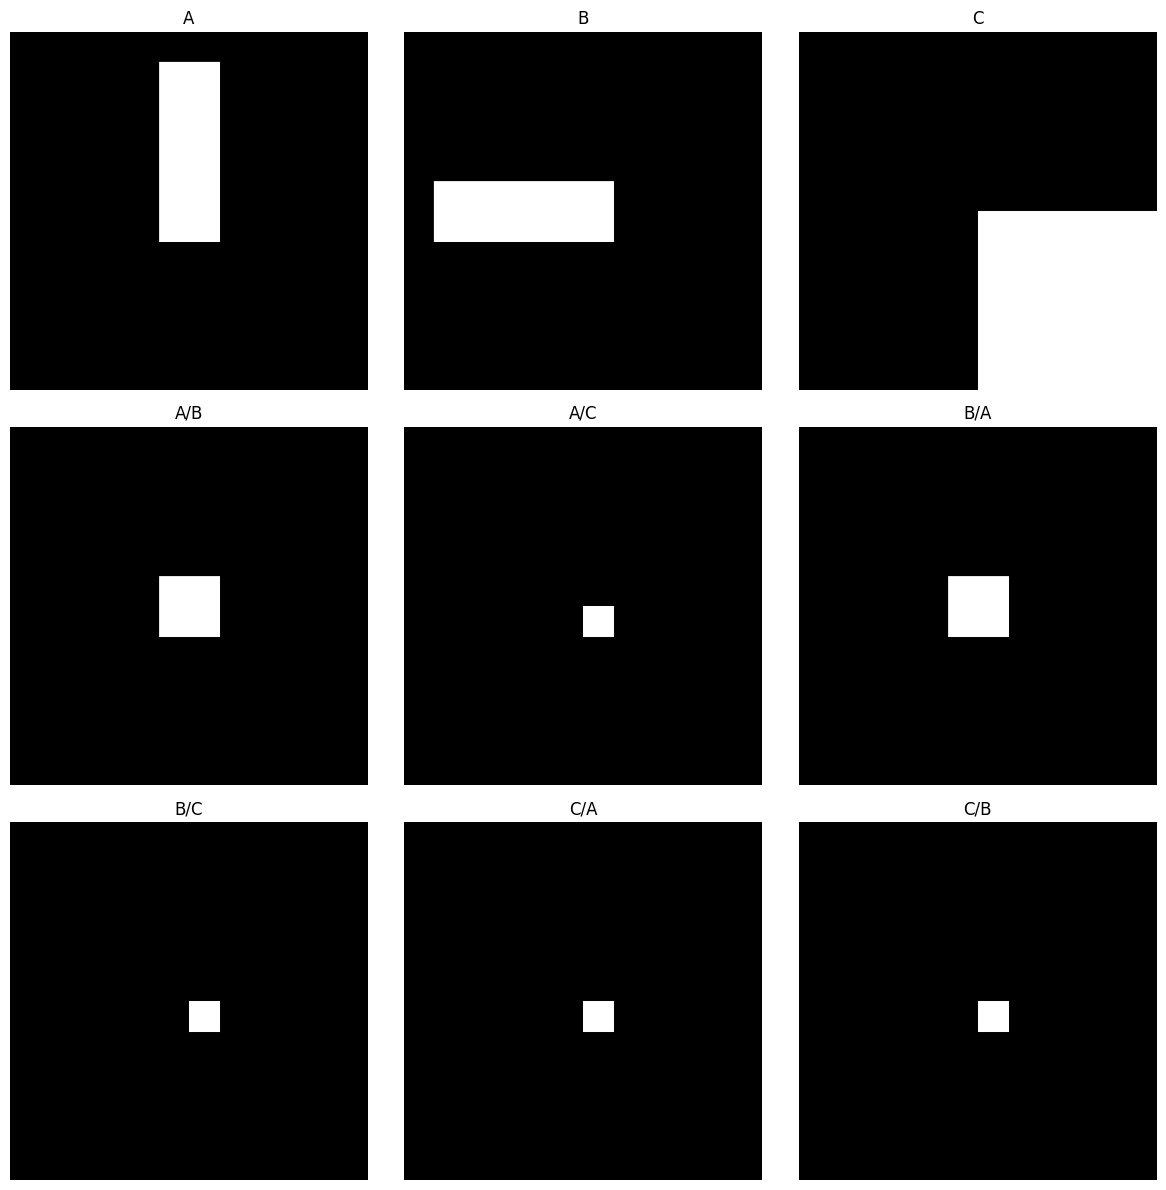

A/B == B/A: True
A/C == C/A: True


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Imagem A: zeros e um retângulo de 1s
## linhas e colunas vão de 0 a 299
A = np.zeros((300, 300), dtype=np.uint8)
# 125:175
A[25:176, 125:176] = 1

# Imagem B: zeros e outro retângulo de 1s
B = np.zeros((300, 300), dtype=np.uint8)
B[125:176, 25:176] = 1

# Imagem C: zeros e um quadrado de 1s no canto inferior direito
C = np.zeros((300, 300), dtype=np.uint8)
C[150:300, 150:300] = 1
print(C[150,150])

# As possiveis subtrações são A/B A/C B/A B/C C/A C/B
somas = {
    'A/B': np.where(B != 0, A / B, 0),
    'A/C': np.where(C != 0, A / C, 0),
    'B/A': np.where(A != 0, B / A, 0),
    'B/C': np.where(C != 0, B / C, 0),
    'C/B': np.where(B != 0, C / B, 0),
    'C/A': np.where(A != 0, C / A, 0),
}

titulos = ['A', 'B', 'C', 'A/B', 'A/C', 'B/A', 'B/C', 'C/A', 'C/B']
imagens = [A, B, C, somas['A/B'], somas['A/C'], somas['B/A'], somas['B/C'], somas['C/A'], somas['C/B']]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for ax, img, title in zip(axs.flat, imagens, titulos):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Verificar se a ordem dos fatores altera o resultado
print('A/B == B/A:', np.array_equal(somas['A/B'], somas['B/A']))
print('A/C == C/A:', np.array_equal(somas['A/C'], somas['C/A']))

## Exercício 07
Abra o arquivo de imagem ‘lenaCor.bmp’ e execute as seguinte tarefas:
1. Exiba a imagem
2. Exiba apenas o primeiro canal da imagem
3. Exiba o tamanho da imagem
4. Remova 50 pixels de cada lado da imagem e a exiba.
5. Crie uma imagem em tons de cinza com base na média dos 3 canais e exiba essa imagem. 

## Exercício 08 
1. Abra a imagem “folha.png”. Crie uma nova imagem contendo apenas os pontos da fronteira do objeto usando 
a) Adjacência-4 
b) Adjacência-8 Verifique se há diferenças nas imagens geradas.